<a href="https://colab.research.google.com/github/Chlafen/Emotion-Detection-PPP/blob/master/Emotion_Detection_PPP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Emotion Detection project
###The project aims to develop a deep learning model using CNNs to accurately classify facial expressions into seven categories: Angry, Disgust, Fear, Happy, Sad, Surprise, and Neutral.
 
The *FER-2013* dataset will be used for training.

Realised by: Bouchnak Med Amine, Besrour Ines and Kaabachi Imen.

## PART 1: Data Preprocessing

We will be batching our dataset as it is very large and it would be inefficent to dump it all at once into memory.
We will also be applying data augmentation to the dataset to further diversify the input data, we will use techniques such as... rotation, shifting, and flipping. This can improve the performance of our model.

Loading and preprocessing the dataset:
The dataset consists of 48x48 pixel grayscale images of faces.

In [ ]:
!pip install kaggle

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
!mkdir ~/.kaggle
!touch ~/.kaggle/kaggle.json

api_token = {"username":"chlafen420","key":"8240177a2ebe6c77b9056fd2eb3072a4"}

import json

with open('/root/.kaggle/kaggle.json', 'w') as file:
    json.dump(api_token, file)

!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
# download the dataset
!kaggle datasets download -d msambare/fer2013
# extracting it
!unzip fer2013.zip

fer2013.zip: Skipping, found more recently modified local copy (use --force to force download)
Archive:  fer2013.zip
replace test/angry/PrivateTest_10131363.jpg? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

## Performing data augmentation



In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_dir = '/content/train'
test_dir = '/content/test'

train_datagen = ImageDataGenerator(
    width_shift_range = 0.1,        
    height_shift_range = 0.1,       
    horizontal_flip = True,        
    rescale = 1./255,               
    validation_split = 0.2          # Set aside 20% of the data for validation
)

val_datagen = ImageDataGenerator(
    rescale = 1./255,
    validation_split = 0.2
)

In [ ]:
train_generator = train_datagen.flow_from_directory(
    directory = train_dir,
    target_size = (48, 48),
    batch_size = 64,                 # images per batch
    color_mode = "grayscale",
    class_mode = "categorical",      # 7 different emotions
    subset = "training"              # 80% of the train data
)
val_generator = val_datagen.flow_from_directory(
    directory = train_dir,
    target_size = (48, 48),
    batch_size = 64,
    color_mode = "grayscale",
    class_mode = "categorical",
    subset = "validation"      
)

Found 22968 images belonging to 7 classes.
Found 5741 images belonging to 7 classes.


## Making the model:
Now that we have our train and test data ready, we will create a CNN model to train on our dataset.

Since we are not capable of coming up with a model from scratch, we found this interesting paper https://www.hindawi.com/journals/wcmc/2020/6677907/#EEq3 that proposes a CNN model for our purposes

In [ ]:
import tensorflow as tf 
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dense, Dropout, Flatten, BatchNormalization
from keras.layers.activation import ReLU
from keras.models import Sequential
  

# Define the model architecture
model = Sequential()

# Add a convolutional layer with 32 filters, 3x3 kernel size, and relu activation function
model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(48,48,1)))
# Add a batch normalization layer
model.add(BatchNormalization())
# Add a second convolutional layer with 64 filters, 3x3 kernel size, and relu activation function
model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
# Add a second batch normalization layer
model.add(BatchNormalization())
# Add a max pooling layer with 2x2 pool size
model.add(MaxPooling2D(pool_size=(2, 2)))
# Add a dropout layer with 0.25 dropout rate
model.add(Dropout(0.25))

# Add a third convolutional layer with 128 filters, 3x3 kernel size, and relu activation function
model.add(Conv2D(128, kernel_size=(3, 3), activation='relu'))
# Add a third batch normalization layer
model.add(BatchNormalization())
# Add a fourth convolutional layer with 128 filters, 3x3 kernel size, and relu activation function
model.add(Conv2D(128, kernel_size=(3, 3), activation='relu'))
# Add a fourth batch normalization layer
model.add(BatchNormalization())
# Add a max pooling layer with 2x2 pool size
model.add(MaxPooling2D(pool_size=(2, 2)))
# Add a dropout layer with 0.25 dropout rate
model.add(Dropout(0.25))

# Add a fifth convolutional layer with 256 filters, 3x3 kernel size, and relu activation function
model.add(Conv2D(256, kernel_size=(3, 3), activation='relu'))
# Add a fifth batch normalization layer
model.add(BatchNormalization())
# Add a sixth convolutional layer with 256 filters, 3x3 kernel size, and relu activation function
model.add(Conv2D(256, kernel_size=(3, 3), activation='relu'))
# Add a sixth batch normalization layer
model.add(BatchNormalization())
# Add a max pooling layer with 2x2 pool size
model.add(MaxPooling2D(pool_size=(2, 2)))
# Add a dropout layer with 0.25 dropout rate
model.add(Dropout(0.25))

# Flatten the output of the convolutional layers
model.add(Flatten())
# Add a dense layer with 256 neurons and relu activation function
model.add(Dense(256, activation='relu'))
# Add a seventh batch normalization layer
model.add(BatchNormalization())
# Add a dropout layer with 0.5 dropout rate
model.add(Dropout(0.5))
# Add a dense layer with 7 neurons (one for each class) and softmax activation function
model.add(Dense(7, activation='softmax'))

# Compile the model with categorical cross-entropy loss, adam optimizer, and accuracy metric
model.compile(loss="categorical_crossentropy", optimizer= tf.keras.optimizers.Adam(lr=0.0001), metrics=['accuracy'])
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 46, 46, 32)        320       
                                                                 
 batch_normalization_7 (Batc  (None, 46, 46, 32)       128       
 hNormalization)                                                 
                                                                 
 conv2d_7 (Conv2D)           (None, 44, 44, 64)        18496     
                                                                 
 batch_normalization_8 (Batc  (None, 44, 44, 64)       256       
 hNormalization)                                                 
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 22, 22, 64)       0         
 2D)                                                             
                                                      

# Now we Train the model on our dataset
We will provide the model with our training data and validation data.
We also export the model so we can later come back to it.

In [ ]:
from tensorflow.keras.callbacks import ModelCheckpoint
model = load_model('/content/model1.h5')

checkpoint_callback = ModelCheckpoint(
    filepath='model_weights.h5',
    monitor='val_accuracy',
    save_best_only=True,
    save_weights_only=True,
    mode='max',
    verbose=1
)

history = model.fit(
    train_generator,
    steps_per_epoch=len(train_generator),
    epochs=50,
    validation_data=val_generator,
    validation_steps=len(val_generator),
    callbacks=[checkpoint_callback]
)

Epoch 1/50
359/359 [==============================] - ETA: 0s - loss: 1.0951 - accuracy: 0.5893
Epoch 1: val_accuracy improved from -inf to 0.57725, saving model to model_weights.h5
359/359 [==============================] - 731s 2s/step - loss: 1.0951 - accuracy: 0.5893 - val_loss: 1.1148 - val_accuracy: 0.5773
Epoch 2/50
359/359 [==============================] - ETA: 0s - loss: 1.0771 - accuracy: 0.5959
Epoch 2: val_accuracy improved from 0.57725 to 0.59641, saving model to model_weights.h5
359/359 [==============================] - 724s 2s/step - loss: 1.0771 - accuracy: 0.5959 - val_loss: 1.1024 - val_accuracy: 0.5964
Epoch 3/50
359/359 [==============================] - ETA: 0s - loss: 1.0570 - accuracy: 0.6060
Epoch 3: val_accuracy improved from 0.59641 to 0.59728, saving model to model_weights.h5
359/359 [==============================] - 737s 2s/step - loss: 1.0570 - accuracy: 0.6060 - val_loss: 1.0711 - val_accuracy: 0.5973
Epoch 4/50
359/359 [==============================] 

In [ ]:
from tensorflow.keras.models import load_model
# model.save('/content/model1.h5')
rec = load_model('/content/model1.h5')

##Camera capture
This is an implementation of video feed into google collab as a regular usage of the cv2 library failed to function in this environment

In [ ]:
import imutils
import numpy as np
import cv2
from google.colab.patches import cv2_imshow
from IPython.display import display, Javascript
from google.colab.output import eval_js
from base64 import b64decode

def take_photo(filename='photo.jpg', quality=0.8):
  js = Javascript('''
    async function takePhoto(quality) {
      const div = document.createElement('div');
      const capture = document.createElement('button');
      capture.textContent = 'Capture';
      div.appendChild(capture);

      const video = document.createElement('video');
      video.style.display = 'block';
      const stream = await navigator.mediaDevices.getUserMedia({video: true});

      document.body.appendChild(div);
      div.appendChild(video);
      video.srcObject = stream;
      await video.play();

      // Resize the output to fit the video element.
      google.colab.output.setIframeHeight(document.documentElement.scrollHeight, true);

      // Wait for Capture to be clicked.
      await new Promise((resolve) => capture.onclick = resolve);

      const canvas = document.createElement('canvas');
      canvas.width = video.videoWidth;
      canvas.height = video.videoHeight;
      canvas.getContext('2d').drawImage(video, 0, 0);
      stream.getVideoTracks()[0].stop();
      div.remove();
      return canvas.toDataURL('image/jpeg', quality);
    }
    ''')
  display(js)
  data = eval_js('takePhoto({})'.format(quality))
  binary = b64decode(data.split(',')[1])
  with open(filename, 'wb') as f:
    f.write(binary)
  return filename

##Importing Multiple Faces detection
Since we need facial data to feed to our model, we use a pre-existing one that detects multiple faces in a single image. 

In [ ]:
!wget -N https://raw.githubusercontent.com/opencv/opencv/master/samples/dnn/face_detector/deploy.prototxt
!wget -N https://raw.githubusercontent.com/opencv/opencv_3rdparty/dnn_samples_face_detector_20170830/res10_300x300_ssd_iter_140000.caffemodel

##Preprocessing Face images
The preprocess_image() function will normalize our facial data to be able to fit into our model's input 

In [ ]:
def preprocess_image(image):
    # Convert image to grayscale
    image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    # Resize image to 48x48 pixels
    image = cv2.resize(image, (48, 48))
    # Normalize image
    image = image.astype('float32') / 255.0
    return image

##Using the model
This section will first take detected faces, normalize them, feed them as a batch to our Emotion Detection model, and finally spit out the results.

The script should output each face's most probable emotion alongside other emotions' percentages

<IPython.core.display.Javascript object>

[INFO] loading model...
[INFO] computing object detections...


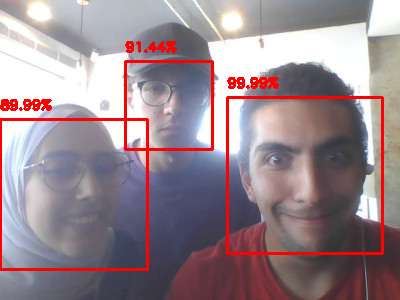

Detected faces:
1/1 [==============================] - 0s 39ms/step
[[0.11695678 0.01197352 0.16689505 0.25636888 0.29746577 0.10084608
  0.04949395]
 [0.10896669 0.00333813 0.13063091 0.02354158 0.4400445  0.26667863
  0.02679954]
 [0.06543988 0.0047488  0.05523652 0.25059685 0.42166853 0.18954054
  0.0127689 ]]
Angry: 11.70%
Disgust: 1.20%
Fear: 16.69%
Happy: 25.64%
Neutral: 29.75%
Sad: 10.08%
Surprise: 4.95%


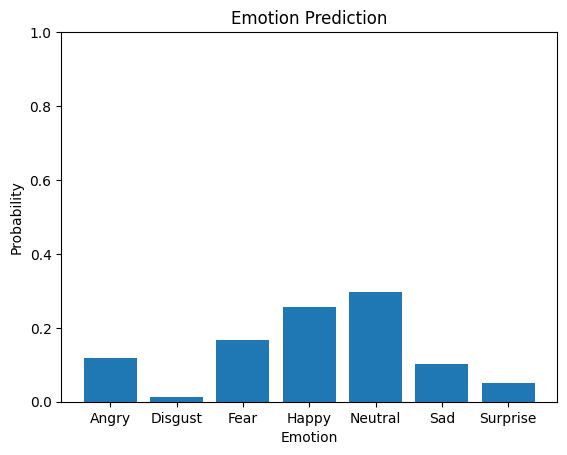

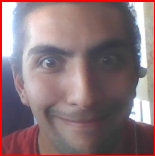

Angry: 10.90%
Disgust: 0.33%
Fear: 13.06%
Happy: 2.35%
Neutral: 44.00%
Sad: 26.67%
Surprise: 2.68%


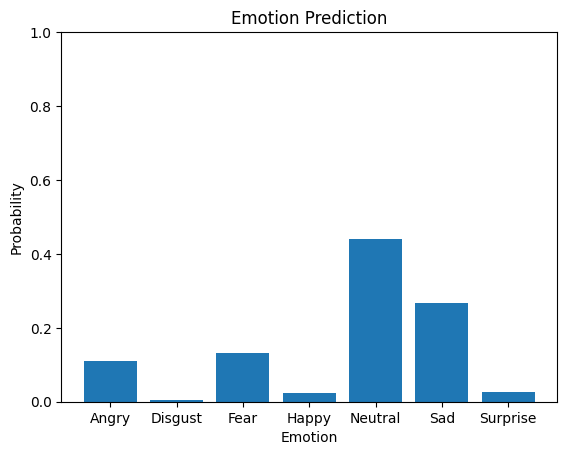

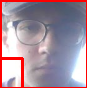

Angry: 6.54%
Disgust: 0.47%
Fear: 5.52%
Happy: 25.06%
Neutral: 42.17%
Sad: 18.95%
Surprise: 1.28%


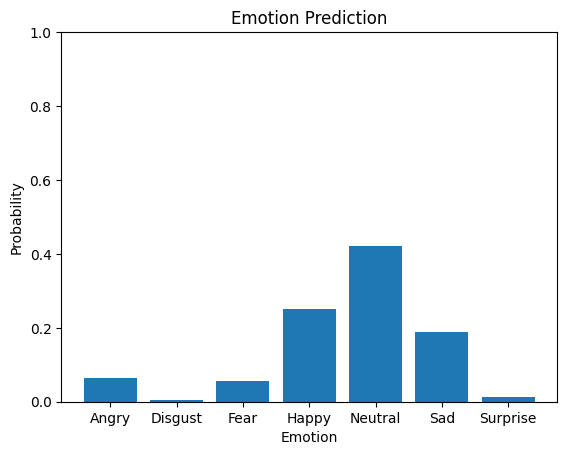

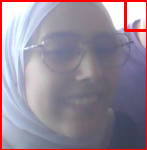

In [ ]:
import matplotlib.pyplot as plt

filename = take_photo() 
image = cv2.imread(filename)
image = imutils.resize(image, width=400)
print("[INFO] loading model...")
prototxt = 'deploy.prototxt'
model = 'res10_300x300_ssd_iter_140000.caffemodel'
net = cv2.dnn.readNetFromCaffe(prototxt, model)

image = imutils.resize(image, width=400)
blob = cv2.dnn.blobFromImage(cv2.resize(image, (300, 300)), 1.0, (300, 300), (104.0, 177.0, 123.0))
print("[INFO] computing object detections...")
net.setInput(blob)
detections = net.forward()
faces = []
for i in range(0, detections.shape[2]):

  # extract the confidence (i.e., probability) associated with the prediction
  confidence = detections[0, 0, i, 2]

  # filter out weak detections by ensuring the `confidence` is
  # greater than the minimum confidence threshold
  if confidence > 0.5:
    # compute the (x, y)-coordinates of the bounding box for the object
    (h, w) = image.shape[:2]
    box = detections[0, 0, i, 3:7] * np.array([w, h, w, h])
    (startX, startY, endX, endY) = box.astype("int")
    xw = endX - startX
    yw = endY - startY
    diff = abs(yw-xw)//2
    startX = max(0, startX-diff)
    endX = max(0, endX+diff)
    faces.append(image[startY:endY, startX:endX])
    # draw the bounding box of the face along with the associated probability
    text = "{:.2f}%".format(confidence * 100)
    y = startY - 10 if startY - 10 > 10 else startY + 10
    cv2.rectangle(image, (startX, startY), (endX, endY), (0, 0, 255), 2)
    cv2.putText(image, text, (startX, y), cv2.FONT_HERSHEY_SIMPLEX, 0.45, (0, 0, 255), 2)
cv2_imshow(image)
print("Detected faces:")

emotions = ["Angry", "Disgust", "Fear", "Happy", "Neutral", "Sad", "Surprise"]
frames = []

for face in faces:
    frame = preprocess_image(face)  # Preprocess the face image
    frames.append(frame)  # Append the preprocessed frame to the list

input_batch = np.array(frames)  # Convert the list of frames to a NumPy array

# Ensure the input batch has the expected shape (batch_size, 48, 48, 1)
input_batch = np.expand_dims(input_batch, axis=-1)


predictions = rec.predict(input_batch)

print(predictions)
for pred_i in range(len(predictions)):
    prediction = predictions[pred_i]
    predicted_idx = np.argmax(prediction)

    for i in range(len(emotions)): 
      predicted_probability = prediction[i]
      formatted_probability = "{:.2%}".format(predicted_probability)
      if i==predicted_idx:
        color = '\033[92m'  
      else:
        color='\033[91m'
      print(color+emotions[i]+': '+formatted_probability)
    plt.bar(emotions, prediction)
    plt.xlabel('Emotion')
    plt.ylabel('Probability')
    plt.title('Emotion Prediction')
    plt.ylim(0, 1)  # Set the y-axis limit to range from 0 to 1
    plt.show()
    cv2_imshow(faces[pred_i])

